In [1]:
import numpy as np
import os
import cv2

from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

/Users/tyronemariano/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
model = load_model(os.path.expanduser('~/Desktop/melanoma_cnn.h5'))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,055,908 (65.06 MB)

 Trainable params: 17,053,730 (65.05 MB)

 Non-trainable params: 2,176 (8.50 KB)

 Optimizer params: 2 (12.00 B)

In [3]:
SIZE = 128

image = cv2.imread('test_data/test.jpg')
image = Image.fromarray(image, 'RGB')
image = image.resize((SIZE, SIZE))
image = np.array(image)/255

In [4]:
image

array([[[0.63921569, 0.68235294, 0.80784314],
        [0.58039216, 0.62352941, 0.74901961],
        [0.56470588, 0.60784314, 0.73333333],
        ...,
        [0.68627451, 0.7254902 , 0.79215686],
        [0.66666667, 0.70588235, 0.77254902],
        [0.69411765, 0.73333333, 0.8       ]],

       [[0.62352941, 0.67058824, 0.79215686],
        [0.60784314, 0.65098039, 0.77647059],
        [0.58823529, 0.63137255, 0.75686275],
        ...,
        [0.65882353, 0.69803922, 0.76470588],
        [0.65882353, 0.69803922, 0.76470588],
        [0.65490196, 0.69411765, 0.76078431]],

       [[0.62352941, 0.67058824, 0.78039216],
        [0.63529412, 0.68235294, 0.79215686],
        [0.63529412, 0.67843137, 0.79215686],
        ...,
        [0.6627451 , 0.70196078, 0.76862745],
        [0.69411765, 0.73333333, 0.8       ],
        [0.68235294, 0.72156863, 0.78823529]],

       ...,

       [[0.67058824, 0.74901961, 0.88235294],
        [0.67058824, 0.74117647, 0.8627451 ],
        [0.72941176, 0

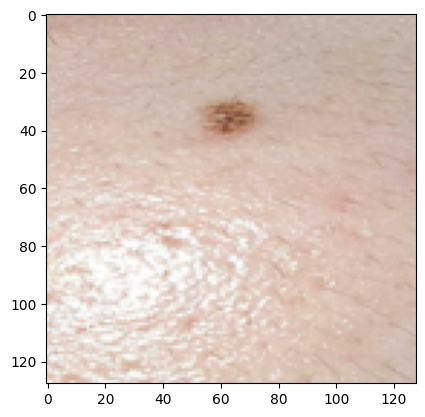

In [8]:
rgb_image = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

In [6]:
pred = model.predict(np.expand_dims(image, 0))
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
[[0.8889418  0.10818919]]
